In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [10]:
filename = '../data/demo-2020-0505.db'
with sqlite3.connect(filename) as con:
    df = pd.read_sql('''select * from inverter_minutely''', con=con)
    
df.LoggedDatetime = pd.to_datetime(df.LoggedDatetime) # datetime的部份，需先做過一次轉換
df.head()

,UniqueID,DeviceID,LoggedDatetime,AlarmCode,ErrorCode,DC1Voltage,DC2Voltage,DC3Voltage,DC4Voltage,DC1Current,...,HeatSinkTemp,AC1Voltage,AC2Voltage,AC3Voltage,AC1Current,AC2Current,AC3Current,ACFrequency,ACOutputPower,KWH
0,1,1,2020-05-05 05:12:02,0,0,235.0,235.0,235.0,235.0,0.0,...,25,282.0,282.0,280.0,0.1,0.0,0.0,60.0,0.0,68850.0
1,2,2,2020-05-05 05:12:02,0,0,235.0,235.0,234.0,235.0,0.0,...,25,283.0,282.0,280.0,0.0,0.0,0.0,60.0,0.0,66818.0
2,3,3,2020-05-05 05:12:02,0,0,234.0,233.0,234.0,234.0,0.0,...,28,282.0,282.0,280.0,0.0,0.0,0.0,60.0,0.0,68208.0
3,4,4,2020-05-05 05:12:02,0,0,231.0,232.0,231.0,231.0,0.0,...,26,281.0,282.0,278.0,0.0,0.0,0.0,60.0,0.0,66521.0
4,5,5,2020-05-05 05:12:02,0,0,234.0,234.0,234.0,234.0,0.0,...,28,282.0,281.0,281.0,0.0,0.0,0.0,60.0,0.0,66793.0


In [11]:
df.query('DeviceID == 1')

,UniqueID,DeviceID,LoggedDatetime,AlarmCode,ErrorCode,DC1Voltage,DC2Voltage,DC3Voltage,DC4Voltage,DC1Current,...,HeatSinkTemp,AC1Voltage,AC2Voltage,AC3Voltage,AC1Current,AC2Current,AC3Current,ACFrequency,ACOutputPower,KWH
0,1,1,2020-05-05 05:12:02,0,0,235.0,235.0,235.0,235.0,0.0,...,25,282.0,282.0,280.0,0.1,0.0,0.0,60.0,0.0,68850.0
5,6,1,2020-05-05 05:13:10,0,0,235.0,235.0,235.0,235.0,0.0,...,28,282.0,282.0,281.0,0.1,0.0,0.0,60.0,0.0,68850.0
11,12,1,2020-05-05 05:14:14,0,0,235.0,235.0,235.0,235.0,0.0,...,29,283.0,282.0,280.0,0.2,0.0,0.1,60.0,0.0,68850.0
17,18,1,2020-05-05 05:15:17,85899346080,0,647.0,647.0,647.0,647.0,0.0,...,32,283.0,283.0,280.0,0.1,0.0,0.0,59.9,0.0,68850.0
23,24,1,2020-05-05 05:16:18,85899346080,0,658.0,658.0,658.0,658.0,0.0,...,32,283.0,283.0,281.0,0.1,0.0,0.0,60.1,0.0,68850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,5330,1,2020-05-05 18:47:09,0,0,203.0,212.0,194.0,215.0,0.0,...,38,282.0,280.0,279.0,2.0,2.0,1.9,60.0,0.0,69181.0
5336,5337,1,2020-05-05 18:48:10,0,0,214.0,206.0,185.0,213.0,0.0,...,38,282.0,281.0,280.0,1.9,1.9,1.9,59.9,0.0,69181.0
5343,5344,1,2020-05-05 18:49:11,0,0,203.0,199.0,196.0,209.0,0.0,...,38,282.0,282.0,280.0,1.9,2.0,1.8,59.9,0.0,69181.0
5350,5351,1,2020-05-05 18:50:13,0,0,203.0,201.0,194.0,195.0,0.0,...,38,282.0,281.0,280.0,1.9,2.1,1.9,59.8,0.0,69181.0


In [12]:
dfs = {}
device_identifies = [1,2,3,4,5,18,19]
for id in device_identifies:
    cmd = 'DeviceID == {}'.format(id)
    dfs[id] = df.query(cmd) 

1
2
3
4
5
18
19


Text(0.5, 1.0, '../data/demo-2020-0505.db')

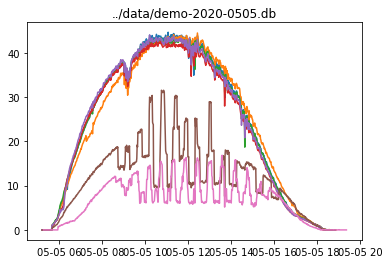

In [13]:
#fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
fig, ax = plt.subplots(1)

for id in device_identifies:
    print(id)
    df = dfs.get(id)
    ax.plot(df.LoggedDatetime, df.ACOutputPower)
ax.set_title(filename)

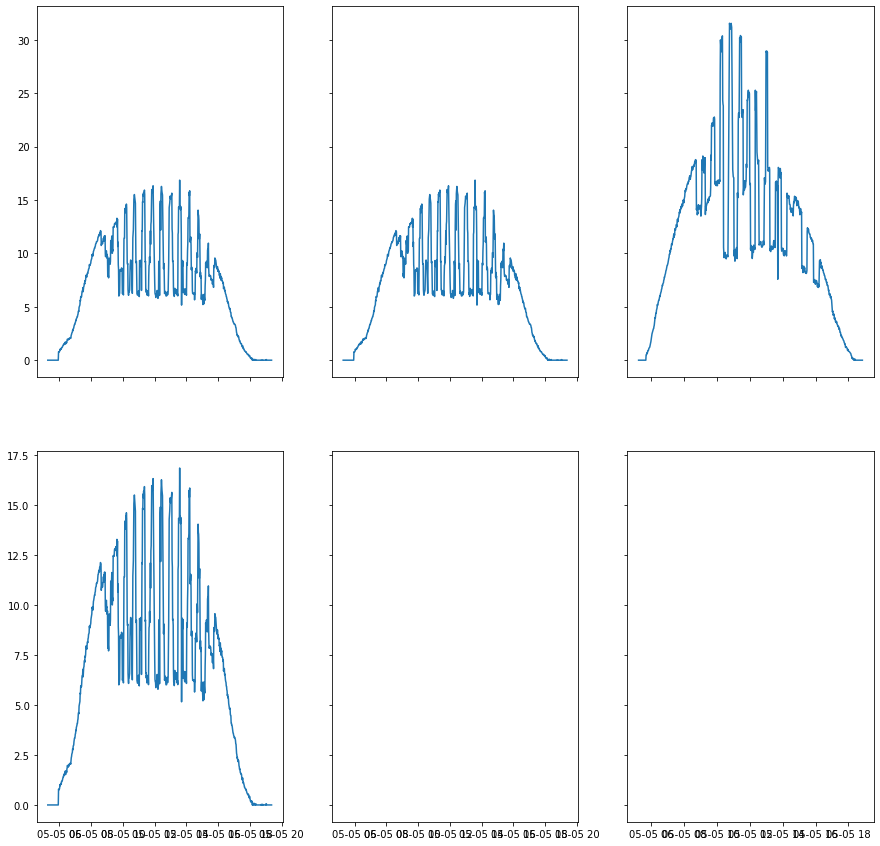

In [14]:
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row')
fig.set_figheight(15)
fig.set_figwidth(15)

df1 = dfs.get(1)
axes[0,0].plot(df.LoggedDatetime, df.ACOutputPower)

df2 = dfs.get(2)
axes[0,1].plot(df.LoggedDatetime, df.ACOutputPower)

df = dfs.get(18)
axes[0,2].plot(df.LoggedDatetime, df.ACOutputPower)

df = dfs.get(19)
axes[1,0].plot(df.LoggedDatetime, df.ACOutputPower)
